In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_USA = pd.read_csv("C:\\Users\\Welcome\\Downloads\\US_Accidents_March23.csv")

In [13]:
df_USA.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [34]:
# Filtering California data
df_CA = df_USA[df_USA['State'] == 'CA']


In [35]:
# Extract numerical part of ID
df_CA['IDD'] = df_CA['ID'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

C:\Users\Welcome\AppData\Local\Temp\ipykernel_13804\4076155916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CA['IDD'] = df_CA['ID'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)


In [17]:
# Check for non-numeric values in numeric columns
print("Data types before processing:")
print(df_CA.dtypes)


Data types before processing:
ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity      

Column 'ID' unique values:
['A-729' 'A-730' 'A-731' ... 'A-7777759' 'A-7777760' 'A-7777761']

Column 'Source' unique values:
['Source2' 'Source3' 'Source1']

Column 'Start_Time' unique values:
['2016-06-21 10:34:40' '2016-06-21 10:30:16' '2016-06-21 10:49:14' ...
 '2019-08-23 19:11:30' '2019-08-23 19:00:21' '2019-08-23 18:52:06']

Column 'End_Time' unique values:
['2016-06-21 11:04:40' '2016-06-21 11:16:39' '2016-06-21 11:19:14' ...
 '2019-08-23 19:28:49' '2019-08-23 19:29:42' '2019-08-23 19:21:31']

Column 'Description' unique values:
['Right hand shoulder blocked due to accident on I-80 Westbound at Magazine St.'
 'Accident on I-880 Northbound at Exit 26 Tennyson Rd.'
 'Right lane blocked due to accident on CA-24 Westbound at I-680.' ...
 'Ramp closed to Bristol St - Road closed due to accident.'
 'At Friars Rd - Accident. Center lane blocked.'
 'Ramp closed to The City Dr/Exit 14A - Road closed due to accident.']

Column 'Street' unique values:
['Magazine St' 'I-880 N' 'I-680 N' ...

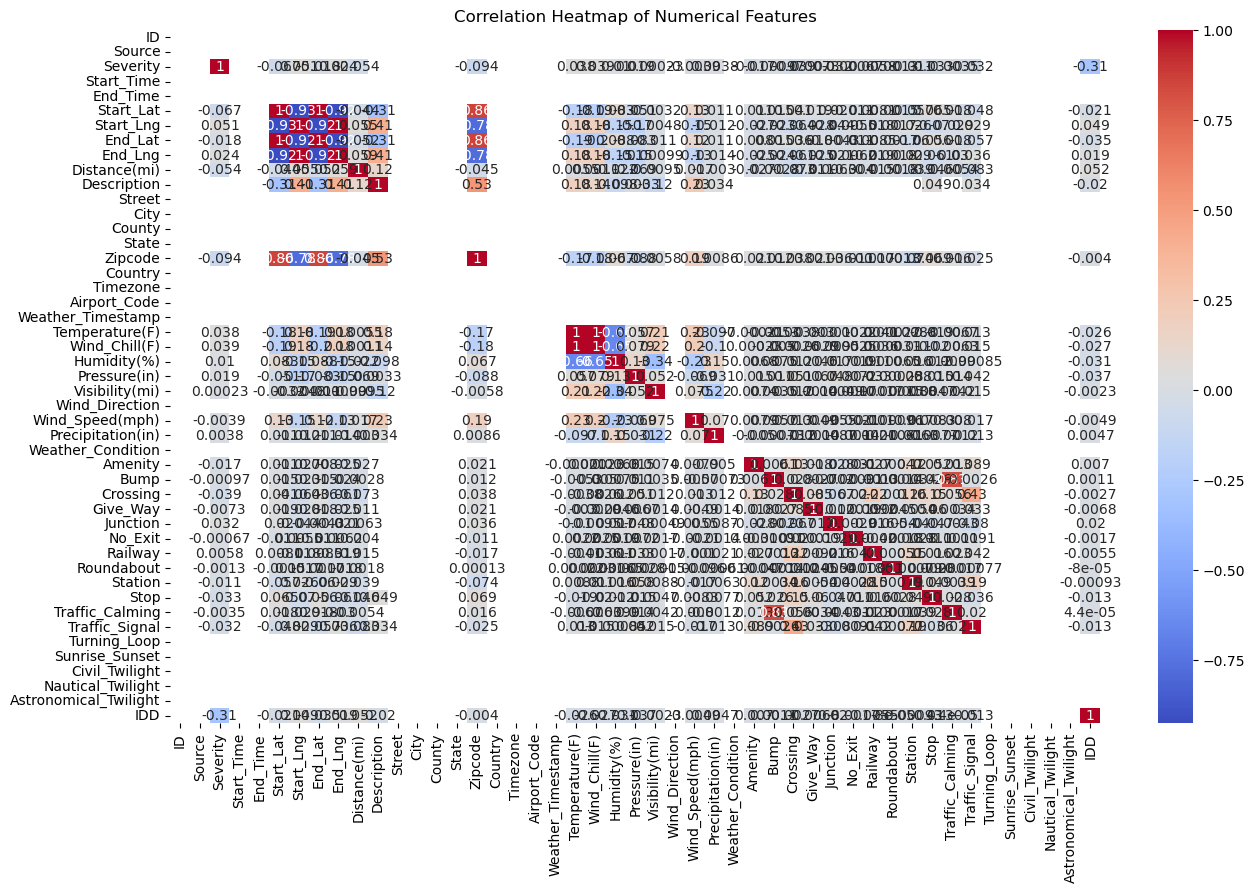

In [18]:
# Check for non-numeric values in the numeric columns
non_numeric_cols = df_CA.columns[df_CA.dtypes == 'object']
for col in non_numeric_cols:
    print(f"Column '{col}' unique values:")
    print(df_CA[col].unique())
    print()

# Remove or convert problematic columns
df_CA = df_CA.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in the columns you care about for correlation
df_CA = df_CA.dropna(subset=['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 
                             'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 
                             'Precipitation(in)'])

# Recheck the data types
print("Data types after reprocessing:")
print(df_CA.dtypes)

# Visualize correlations between numeric features
plt.figure(figsize=(15, 9))
sns.heatmap(df_CA.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


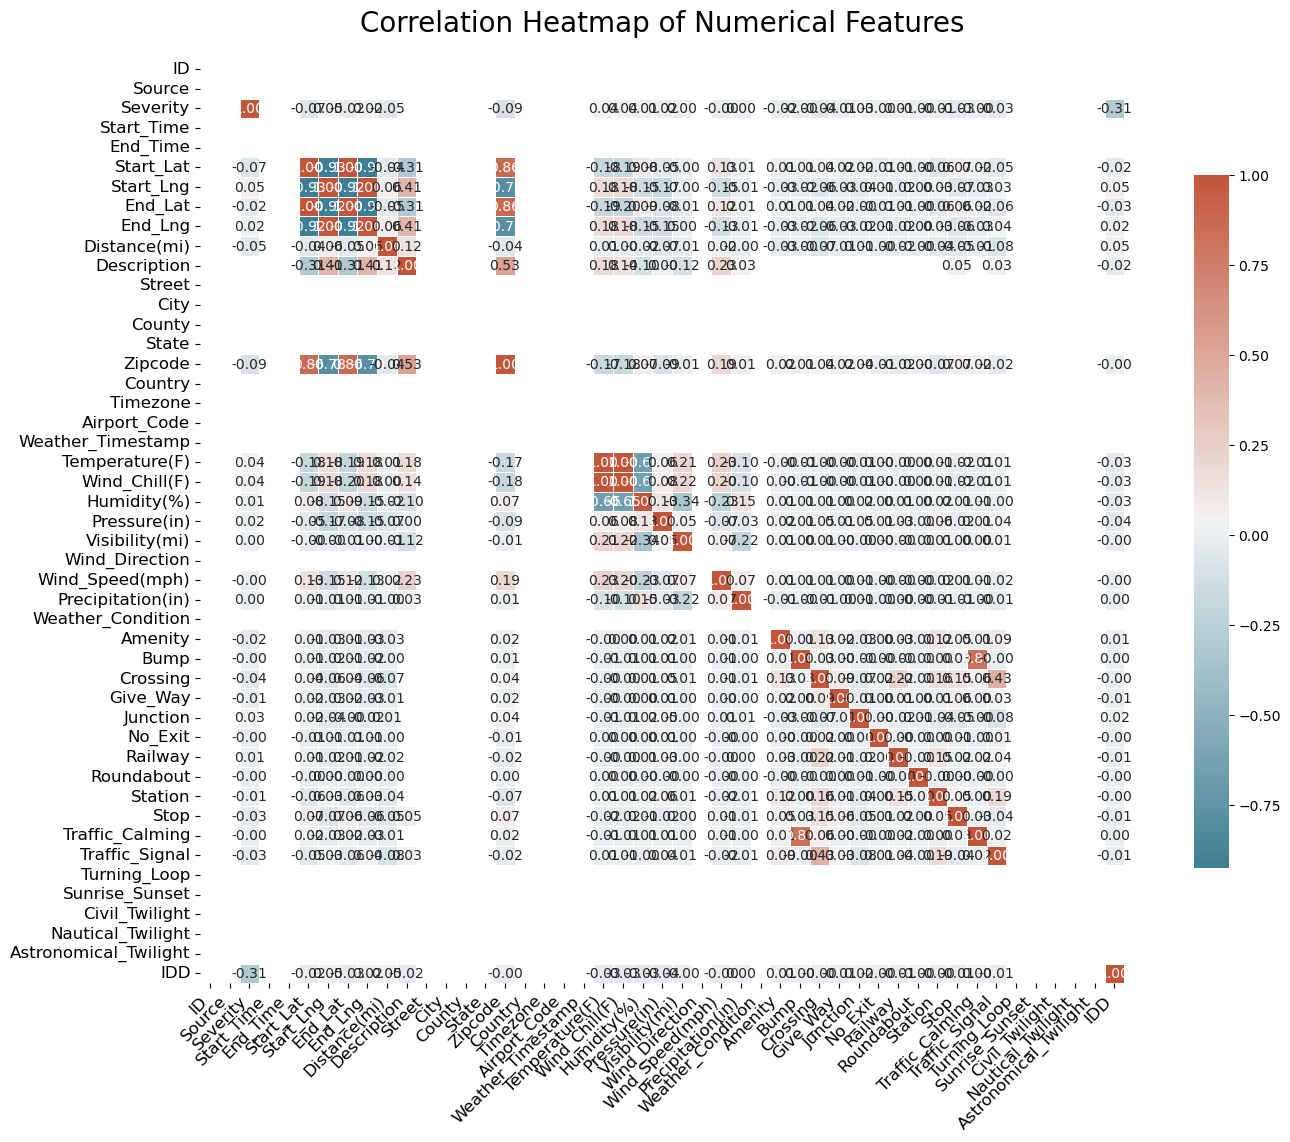

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the correlation matrix
corr_matrix = df_CA.corr()

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(18, 12))

# Create a custom diverging color palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, 
            square=True, cbar_kws={"shrink": 0.75}, linewidths=0.5)

# Add titles and labels for better readability
plt.title('Correlation Heatmap of Numerical Features', fontsize=20, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()


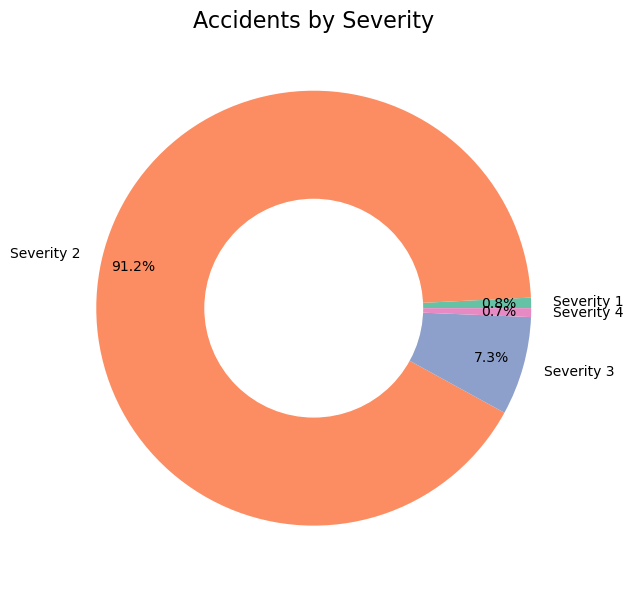

In [27]:
# Group by 'Severity' and count the occurrences
accidents_severity = df_CA['Severity'].value_counts().sort_index()

# Verify that 'accidents_severity' is not empty
if not accidents_severity.empty:
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

    # Define labels corresponding to the severity levels
    labels = [f'Severity {int(level)}' for level in accidents_severity.index]

    # Define colors using seaborn's Set2 palette
    colors = sns.color_palette('Set2', len(labels))

    # Plot the pie chart
    wedges, texts, autotexts = ax.pie(accidents_severity, labels=labels, colors=colors,
                                      autopct='%1.1f%%', pctdistance=0.85)

    # Draw a white circle at the center to make it a donut chart
    circle = plt.Circle((0, 0), 0.5, color='white')
    ax.add_artist(circle)

    # Set the title of the chart
    ax.set_title("Accidents by Severity", fontdict={'fontsize': 16})

    # Improve layout
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("No data available to plot accidents by severity.")



C:\Users\Welcome\AppData\Local\Temp\ipykernel_13804\2015659525.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CA['Start_Time'] = pd.to_datetime(df_CA['Start_Time'], errors='coerce')


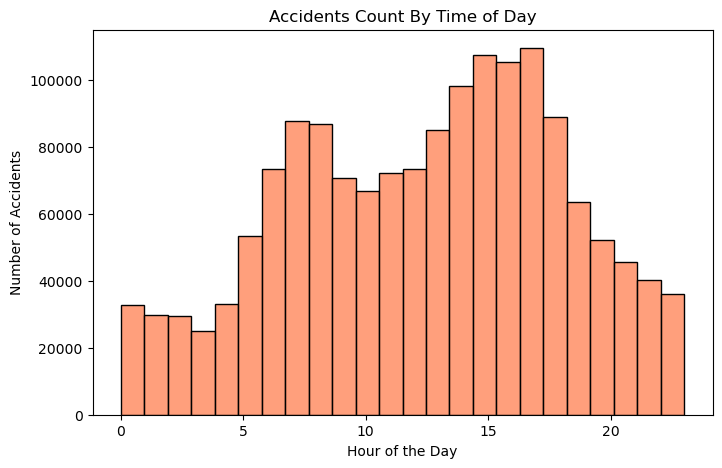

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Start_Time' is a datetime object
df_CA['Start_Time'] = pd.to_datetime(df_CA['Start_Time'], errors='coerce')

# Plot the distribution of accidents by hour of the day
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(df_CA['Start_Time'].dt.hour, bins=24, color='coral')

# Label the axes and the plot
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.title('Accidents Count By Time of Day')

# Display the plot
plt.show()


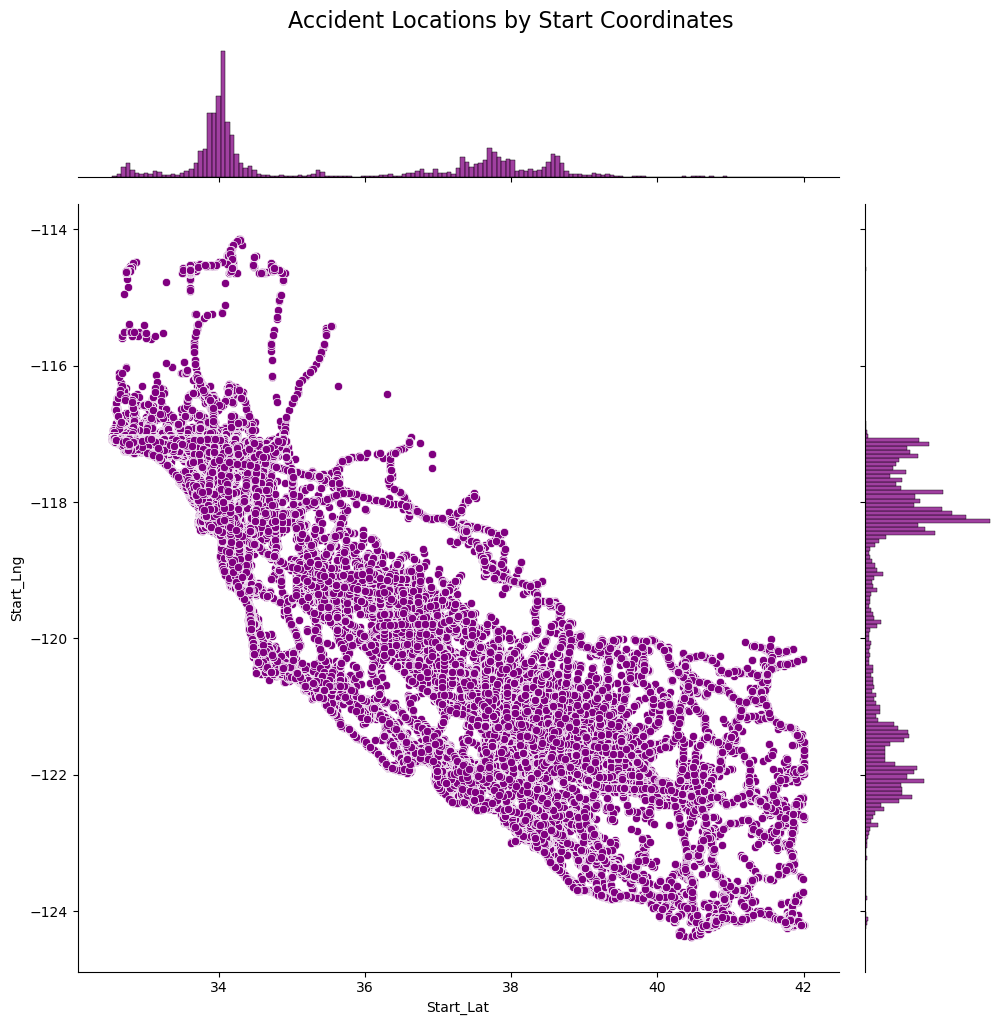

In [37]:
# Ensure the columns are not empty
df_filtered = df_CA[['Start_Lat', 'Start_Lng']].dropna()

# Create a jointplot
sns.jointplot(x='Start_Lat', y='Start_Lng', data=df_filtered, height=10, color='purple')

# Add a title to the plot
plt.suptitle('Accident Locations by Start Coordinates', y=1.02, fontsize=16)

# Show the plot
plt.show()
